---
# Assignment 3

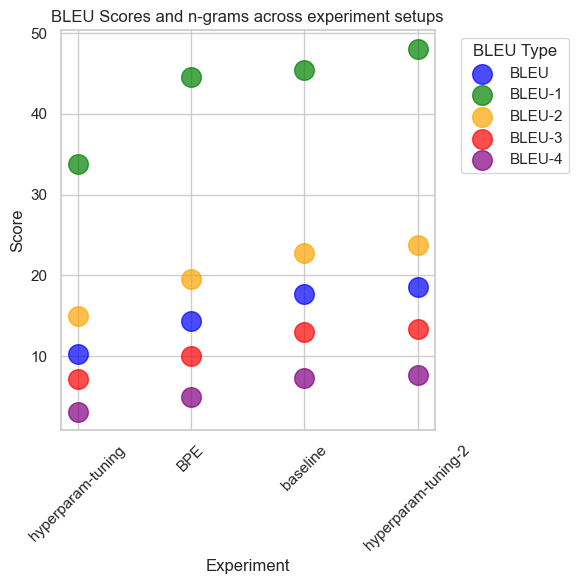

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Experiment": [
        "hyperparam-tuning", "BPE", "baseline", "hyperparam-tuning-2"
    ],
    "BLEU": [
        10.3, 14.4, 17.7, 18.5
    ],
    "BLEU-1": [
        33.8, 44.6, 45.5, 48.1
    ],
    "BLEU-2": [
        15.0, 19.6, 22.8, 23.7
    ],
    "BLEU-3": [
        7.2, 10.0, 13.0, 13.3
    ],
    "BLEU-4": [
        3.1, 4.9, 7.3, 7.7
    ]
}

df = pd.DataFrame(data)

# Melt df
df_melted = df.melt(id_vars=["Experiment"],
                    value_vars=["BLEU", "BLEU-1", "BLEU-2", "BLEU-3", "BLEU-4"],
                    var_name="BLEU Type", value_name="Score")

sns.set(style="whitegrid")
colors = {
    "BLEU": "blue",
    "BLEU-1": "green",
    "BLEU-2": "orange",
    "BLEU-3": "red",
    "BLEU-4": "purple"
}

plt.figure(figsize=(6, 6))
for bleu_type, color in colors.items():
    subset = df_melted[df_melted["BLEU Type"] == bleu_type]
    plt.scatter(subset["Experiment"], subset["Score"], label=bleu_type, color=color, s=200, alpha=0.7)

plt.title("BLEU Scores and n-grams across experiment setups")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.xlabel("Experiment")
plt.legend(title="BLEU Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("./results.png")

plt.show()


----

# Assignment 5

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

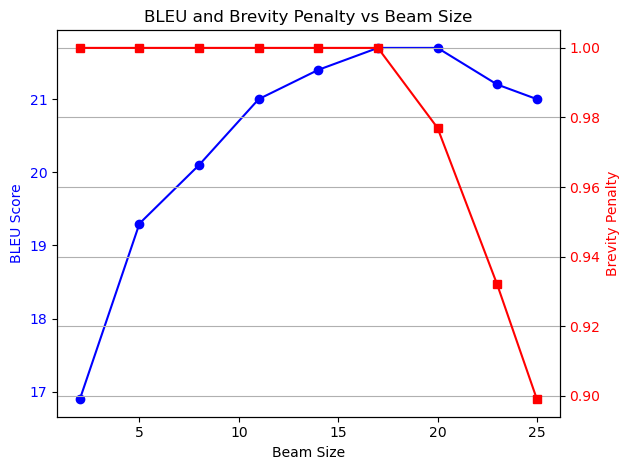

In [17]:


beams = [2, 5, 8, 11, 14, 17, 20, 23, 25]
BLEUs = [16.9, 19.3, 20.1, 21.0, 21.4, 21.7, 21.7, 21.2, 21.0]
brevity_penalties = [1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 0.977, 0.932, 0.899]

fig, ax1 = plt.subplots()

# Plot BLEU scores
ax1.plot(beams, BLEUs, 'b-o', label="BLEU Score")
ax1.set_xlabel("Beam Size")
ax1.set_ylabel("BLEU Score", color="b")
ax1.tick_params(axis="y", labelcolor="b")

# Plot brevity penalties
ax2 = ax1.twinx()
ax2.plot(beams, brevity_penalties, 'r-s', label="Brevity Penalty")
ax2.set_ylabel("Brevity Penalty", color="r")
ax2.tick_params(axis="y", labelcolor="r")

# Title and legend
plt.title("BLEU and Brevity Penalty vs Beam Size")
fig.tight_layout()
plt.grid(True)
plt.savefig("plot.pdf")

plt.show()